In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

In [2]:
df = pd.read_excel('Train_dataset.xlsx')

In [3]:
df.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  ...    HBB d-dimer  \
0       1.0         Farmer         Public         2  ...   93.0   233.0   
1       2.0         Farmer           Walk         2  ...   56.0   328.0   
2       1.0        Cleaner         Public         2  ...  137.0   213.0   
3       1.0         Driver            Car         2  ...  167.0   275.0   
4       2.0  Manufacturing            Car         2  ...  153.0   331.0   

   Heart rate  HDL cholesterol Charlson Index Blood Glucose  Insurance  \
0        82.0             58.0             27             7  3600000.0   
1        89.0             68.0              5             6  1600000.0   
2        77.0             43.0             40             6  3400000.0   
3        64.0             60.0             27             7   700000.0   
4        71.0             64.0             32             7  3200000.0   

    salary  FT/month  Infect_Prob  
0  1300000       2.0    49.135010  
1   400000       1.0    51.147880  
2   900000       1.0    73.224000  
3  2300000       1.0    48.779225  
4  1100000       1.0    87.868800  

[5 rows x 28 columns]

In [4]:
df.shape

(10714, 28)

In [5]:
df.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

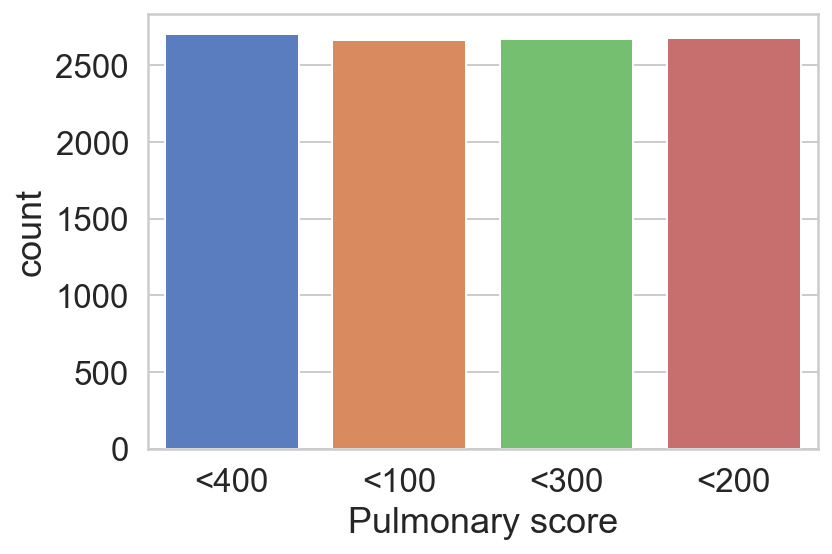

In [6]:
sns.countplot(x='Pulmonary score', data=df);

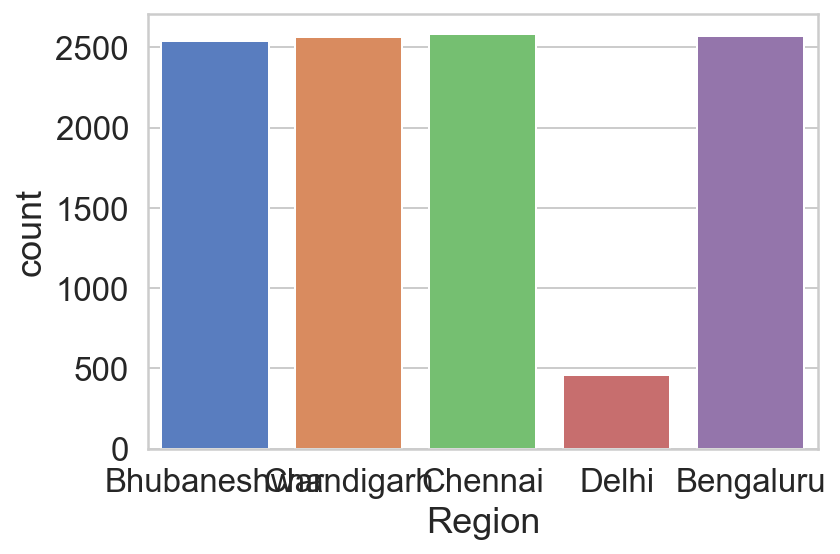

In [7]:
sns.countplot(x='Region', data=df);

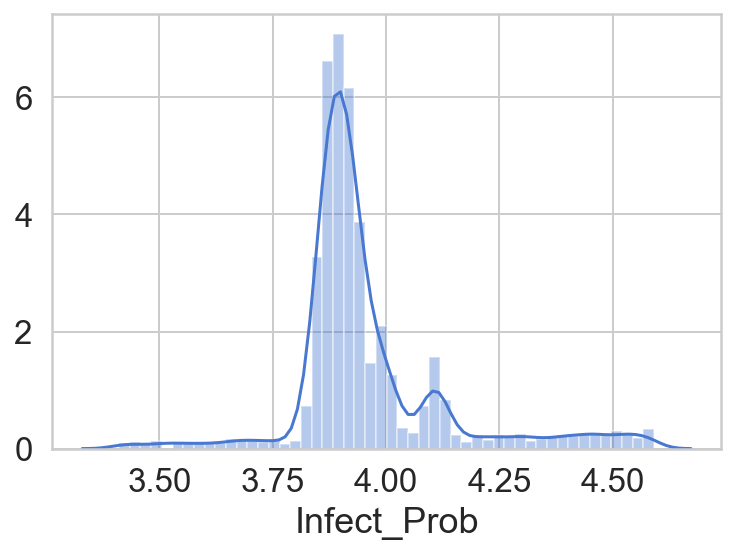

In [8]:
sns.distplot(np.log1p(df.Infect_Prob));

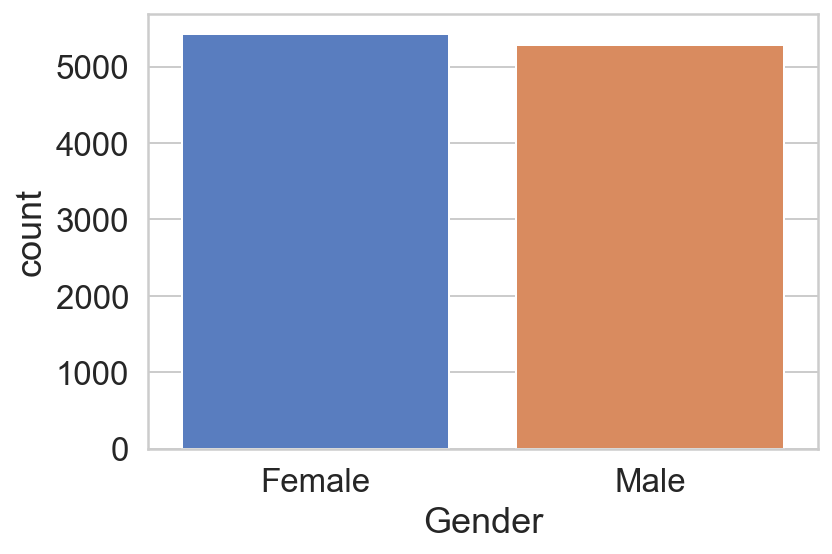

In [9]:
sns.countplot(x='Gender', data=df);

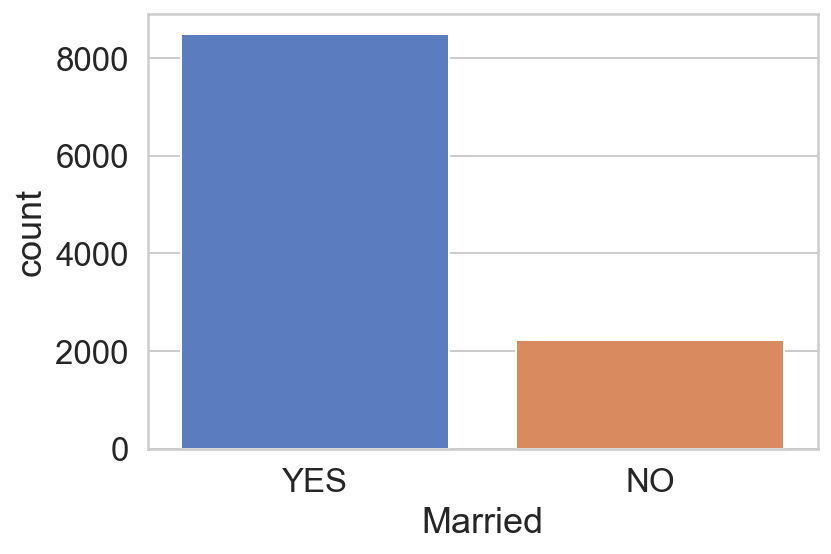

In [10]:
sns.countplot(x='Married', data=df);

In [11]:
corr_matrix = df.corr()
price_corr = corr_matrix['Infect_Prob']
price_corr.iloc[price_corr.abs().argsort()]

FT/month          -0.001474
Heart rate        -0.003647
Diuresis           0.006887
Blood Glucose     -0.009654
Insurance          0.009996
Charlson Index    -0.011368
HDL cholesterol    0.013288
HBB                0.019361
d-dimer            0.021304
salary            -0.024621
Coma score         0.038400
Platelets          0.066727
people_ID          0.079361
cases/1M           0.172871
Deaths/1M          0.174994
Children           0.226795
Age               -0.331258
Infect_Prob        1.000000
Name: Infect_Prob, dtype: float64

In [12]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Heart rate                1114
d-dimer                   1114
Insurance                 1090
Platelets                  924
Occupation                 747
FT/month                   723
Diuresis                   716
Children                   311
comorbidity                226
cardiological pressure      97
HDL cholesterol             35
Name                        20
HBB                         16
Mode_transport               3
dtype: int64

In [13]:
df = df.drop(['people_ID','Heart rate', 'd-dimer', 'Married','Insurance', 'Platelets', 'Occupation', 'FT/month', 'Diuresis' , 'Children' , 'comorbidity' ,'Designation','Gender', 'cardiological pressure' , 'HDL cholesterol' , 'Name' , 'HBB' , 'Mode_transport'], axis=1)

In [14]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [15]:
df.columns

Index(['Region', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score',
       'Pulmonary score', 'Charlson Index', 'Blood Glucose', 'salary',
       'Infect_Prob'],
      dtype='object')

In [16]:
df.head()

Region  cases/1M  Deaths/1M  Age  Coma score Pulmonary score  \
0  Bhubaneshwar         2          0   68           8            <400   
1  Bhubaneshwar         2          0   64          15            <100   
2  Bhubaneshwar         2          0   19          13            <300   
3  Bhubaneshwar         2          0   33           9            <200   
4  Bhubaneshwar         2          0   23           7            <400   

   Charlson Index  Blood Glucose   salary  Infect_Prob  
0              27              7  1300000    49.135010  
1               5              6   400000    51.147880  
2              40              6   900000    73.224000  
3              27              7  2300000    48.779225  
4              32              7  1100000    87.868800

In [17]:
X = df.drop('Infect_Prob', axis=1)
y = np.log1p(df.Infect_Prob.values)

In [18]:
print(y[:10])

[3.91471956 3.95408353 4.30708755 3.90759773 4.48716112 3.92233654
 3.92534113 3.91444058 3.90261736 3.90146945]


In [19]:
from sklearn.preprocessing import OneHotEncoder

data = [['Bhubaneshwar'], ['Chandigarh'], ['Chennai'], ['Bengaluru'], ['Delhi']]

OneHotEncoder(sparse=False).fit_transform(data)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [20]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (MinMaxScaler(), [ 'cases/1M', 'Deaths/1M' , 'Age' , 'Coma score','Charlson Index','Blood Glucose','salary']),
    (OneHotEncoder(handle_unknown="ignore"), [ 'Region', 'Pulmonary score'])
)

In [21]:
transformer.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['cases/1M', 'Deaths/1M', 'Age', 'Coma score',
                                  'Charlson Index', 'Blood Glucose',
                                  'salary']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['Region', 'Pulmonary score'])],
                  verbose=False)

In [22]:
X = transformer.transform(X)

In [23]:
X_train, y_train= X, y

In [24]:
X_train.shape

(10714, 16)

In [25]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mse',
    metrics = ['mse'])

BATCH_SIZE = 32

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 8571 samples, validate on 2143 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8571/8571 [==============================] - 5s 559us/sample - loss: 9.2406 - mean_squared_error: 9.2406 - val_loss: 3.3134 - val_mean_squared_error: 3.3134
Epoch 2/100
8571/8571 [==============================] - 1s 89us/sample - loss: 2.7441 - mean_squared_error: 2.7441 - val_loss: 0.4981 - val_mean_squared_error: 0.4981
Epoch 3/100
8571/8571 [==============================] - 1s 90us/sample - loss: 1.7729 - mean_squared_error: 1.7729 - val_loss: 0.3136 - val_mean_squared_error: 0.3136
Epoch 4/100
8571/8571 [==============================] - 1s 108us/sample - loss: 1.5482 - mean_squared_error: 1.5482 - val_loss: 0.2289 - val_mean_squared_error: 0.

8571/8571 [==============================] - 1s 94us/sample - loss: 0.5939 - mean_squared_error: 0.5939 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 43/100
8571/8571 [==============================] - 1s 111us/sample - loss: 0.6026 - mean_squared_error: 0.6026 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 44/100
8571/8571 [==============================] - 1s 109us/sample - loss: 0.5838 - mean_squared_error: 0.5838 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 45/100
8571/8571 [==============================] - 1s 119us/sample - loss: 0.5696 - mean_squared_error: 0.5696 - val_loss: 0.0591 - val_mean_squared_error: 0.0591
Epoch 46/100
8571/8571 [==============================] - 1s 110us/sample - loss: 0.5724 - mean_squared_error: 0.5724 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 47/100
8571/8571 [==============================] - 1s 102us/sample - loss: 0.5559 - mean_squared_error: 0.5559 - val_loss: 0.0574 - val_mean_squared_error: 0

8571/8571 [==============================] - 1s 152us/sample - loss: 0.2776 - mean_squared_error: 0.2776 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 91/100
8571/8571 [==============================] - 1s 89us/sample - loss: 0.2815 - mean_squared_error: 0.2815 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 92/100
8571/8571 [==============================] - 1s 92us/sample - loss: 0.2620 - mean_squared_error: 0.2620 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 93/100
8571/8571 [==============================] - 1s 92us/sample - loss: 0.2735 - mean_squared_error: 0.2735 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 94/100
8571/8571 [==============================] - 1s 95us/sample - loss: 0.2503 - mean_squared_error: 0.2503 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 95/100
8571/8571 [==============================] - 1s 102us/sample - loss: 0.2507 - mean_squared_error: 0.2507 - val_loss: 0.0432 - val_mean_squared_error: 0.04

In [26]:
dt = pd.read_excel('Test_dataset.xlsx')

In [27]:
dt = dt.drop(['Heart rate', 'd-dimer', 'Married','Insurance', 'Platelets', 'Occupation', 'FT/month', 'Diuresis' , 'Children' ,'Designation','Gender', 'comorbidity' , 'cardiological pressure' , 'HDL cholesterol' , 'Name' , 'HBB' , 'Mode_transport'], axis=1)
X_test=dt;

In [28]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (MinMaxScaler(), [ 'cases/1M', 'Deaths/1M' , 'Age' , 'Coma score','Charlson Index','Blood Glucose']),
    (OneHotEncoder(handle_unknown="ignore"), [ 'Region', 'Pulmonary score'])
)

In [29]:
transformer.fit(X_test)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['cases/1M', 'Deaths/1M', 'Age', 'Coma score',
                                  'Charlson Index', 'Blood Glucose']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['Region', 'Pulmonary score'])],
                  verbose=False)

In [30]:
X_test = transformer.transform(X_test)

In [31]:
X_test.shape

(14498, 16)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print( np.e**(y_pred[1]))

[46.162354]


In [34]:
y_pred.shape

(14498, 1)

In [35]:
dt.shape

(14498, 10)

In [36]:

import csv

with open('prediction.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['ID','Prob'])
    for i in range(14498):   
        row_list=[[dt.people_ID[i], np.e**(y_pred[i])]]
        filewriter.writerows(row_list)